# **Sources**

* Model: https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/
* Data: https://www.kaggle.com/datasets/thedownhill/art-images-drawings-painting-sculpture-engraving

# **Import**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np



# **Preprocessing**

In [2]:
labels = ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']
img_size = 64

def get_data(data_dir):
    data = [] 
    countung_error = 0
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                countung_error +=1
    return np.array(data)

train = get_data('/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/')
val = get_data('/kaggle/input/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/validation_set/')

its = {}
for i, s in enumerate(labels):
    its[i] = s

/tmp/ipykernel_32/438518976.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


Text(0.5, 1.0, 'sculpture')

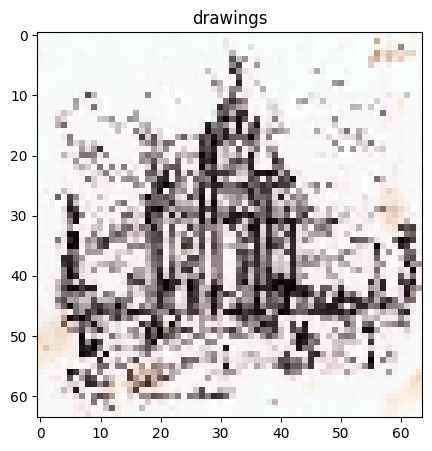

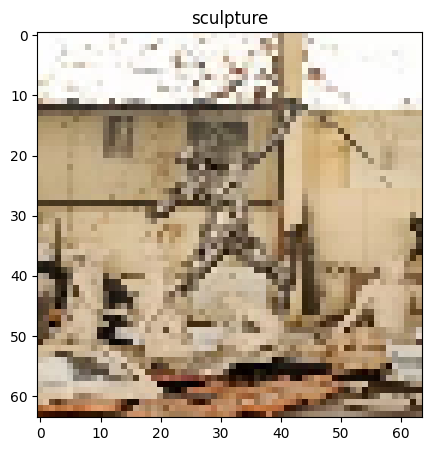

In [3]:
l = []
for i in train:
    l.append(its[i[1]])
# sns.set_style('darkgrid')
# sns.countplot(l)

plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])


plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])



In [4]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images




In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

datagen.fit(x_train)

# **Sequential**

In [6]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(64,64,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5, activation="softmax"))

model.summary()

opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs = 300 , validation_data = (x_val, y_val))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

/opt/conda/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-05-19 02:12:32.744255: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


218/218 [==============================] - 8s 8ms/step - loss: 1.6229 - accuracy: 0.1490 - val_loss: 1.6025 - val_accuracy: 0.2056
Epoch 2/300
218/218 [==============================] - 1s 6ms/step - loss: 1.6016 - accuracy: 0.2042 - val_loss: 1.5865 - val_accuracy: 0.2839
Epoch 3/300
218/218 [==============================] - 1s 6ms/step - loss: 1.5883 - accuracy: 0.2585 - val_loss: 1.5753 - val_accuracy: 0.2874
Epoch 4/300
218/218 [==============================] - 1s 6ms/step - loss: 1.5778 - accuracy: 0.2693 - val_loss: 1.5670 - val_accuracy: 0.2874
Epoch 5/300
218/218 [==============================] - 1s 6ms/step - loss: 1.5683 - accuracy: 0.2812 - val_loss: 1.5598 - val_accuracy: 0.2909
Epoch 6/300
218/218 [==============================] - 1s 6ms/step - loss: 1.5614 - accuracy: 0.2963 - val_loss: 1.5534 - val_accuracy: 0.2932
Epoch 7/300
218/218 [==============================] - 1s 6ms/step - loss: 1.5552 - accuracy: 0.3060 - val_loss: 1.5475 - val_accuracy: 0.2967
Epoch 8/300

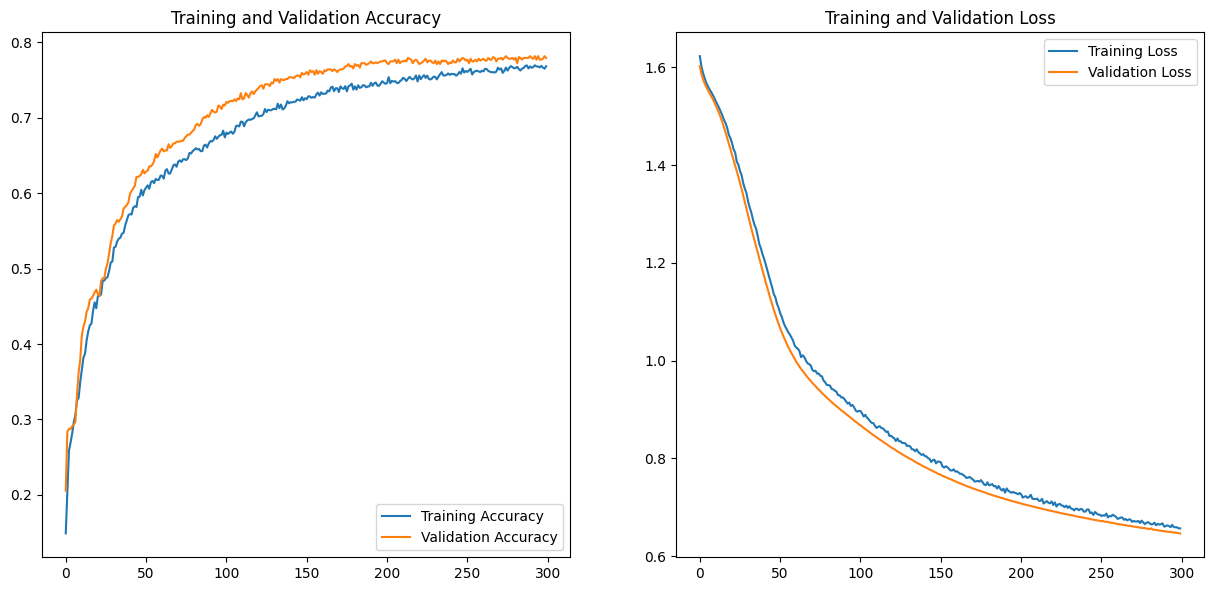

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(300)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [8]:
model.evaluate(x_test, y_test)

25/25 [==============================] - 0s 4ms/step - loss: 0.6402 - accuracy: 0.7827


[0.640223503112793, 0.782664954662323]

# **Sequential with learning rate 0.00001**

In [9]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(64,64,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5, activation="softmax"))

model.summary()

opt = Adam(lr=0.00001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs = 300 , validation_data = (x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)        

2023-05-19 02:19:57.081007: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


218/218 [==============================] - 2s 7ms/step - loss: 1.5517 - accuracy: 0.3299 - val_loss: 1.5079 - val_accuracy: 0.3750
Epoch 2/300
218/218 [==============================] - 1s 5ms/step - loss: 1.4495 - accuracy: 0.4431 - val_loss: 1.3398 - val_accuracy: 0.5631
Epoch 3/300
218/218 [==============================] - 1s 6ms/step - loss: 1.2681 - accuracy: 0.5545 - val_loss: 1.1531 - val_accuracy: 0.6145
Epoch 4/300
218/218 [==============================] - 1s 6ms/step - loss: 1.1218 - accuracy: 0.5902 - val_loss: 1.0338 - val_accuracy: 0.6484
Epoch 5/300
218/218 [==============================] - 1s 6ms/step - loss: 1.0244 - accuracy: 0.6295 - val_loss: 0.9625 - val_accuracy: 0.6706
Epoch 6/300
218/218 [==============================] - 1s 6ms/step - loss: 0.9624 - accuracy: 0.6521 - val_loss: 0.9041 - val_accuracy: 0.7033
Epoch 7/300
218/218 [==============================] - 1s 6ms/step - loss: 0.9087 - accuracy: 0.6826 - val_loss: 0.8555 - val_accuracy: 0.7301
Epoch 8/300

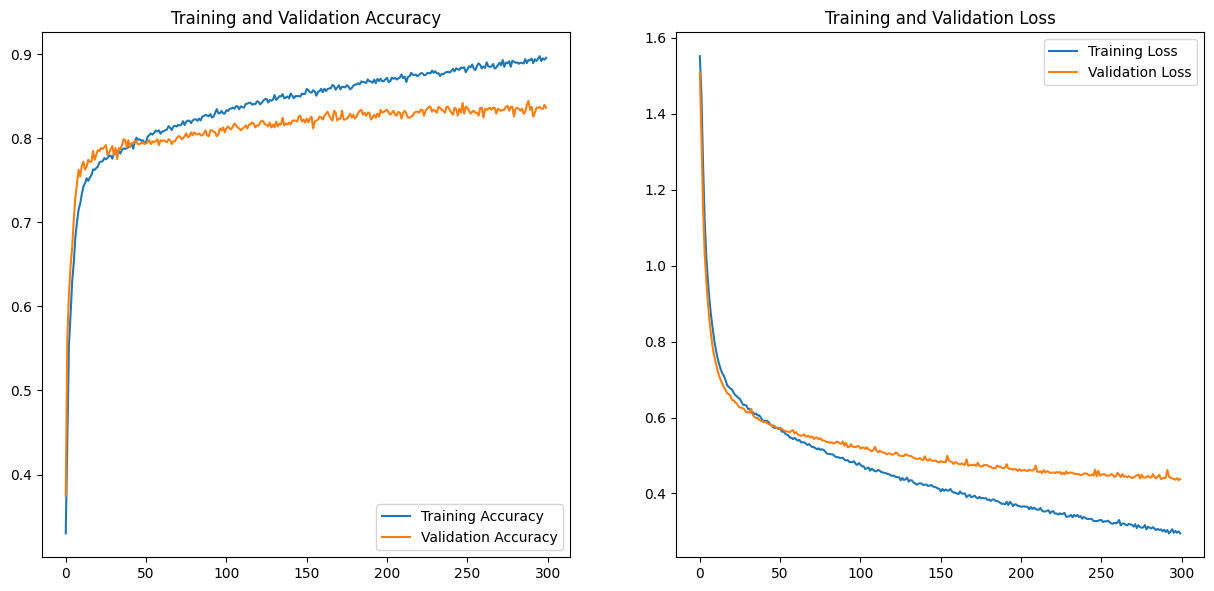

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(300)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [11]:
model.evaluate(x_test, y_test)

25/25 [==============================] - 0s 5ms/step - loss: 0.4224 - accuracy: 0.8461


[0.4223785102367401, 0.8460543155670166]

# **MobileNetV2**

In [20]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (64, 64, 3), include_top = False, weights = "imagenet")
model_MobileNetV2 = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(5, activation="softmax")                                     
                                ])
base_learning_rate = 0.000001
model_MobileNetV2.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
              metrics = ['accuracy'])

history_tf = model_MobileNetV2.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


218/218 [==============================] - 33s 35ms/step - loss: 0.6996 - accuracy: 0.7860 - val_loss: 9.2690 - val_accuracy: 0.2932
Epoch 2/100
218/218 [==============================] - 7s 30ms/step - loss: 0.4824 - accuracy: 0.8516 - val_loss: 7.9483 - val_accuracy: 0.3026
Epoch 3/100
218/218 [==============================] - 7s 33ms/step - loss: 0.3860 - accuracy: 0.8627 - val_loss: 2.7360 - val_accuracy: 0.7290
Epoch 4/100
218/218 [==============================] - 7s 30ms/step - loss: 0.3645 - accuracy: 0.8733 - val_loss: 2.5646 - val_accuracy: 0.7722
Epoch 5/100
218/218 [==============================] - 7s 31ms/step - loss: 0.2916 - accuracy: 0.8951 - val_loss: 2.6992 - val_accuracy: 0.7407
Epoch 6/100
218/218 [==============================] - 7s 31ms/step - loss: 0.3834 - accuracy: 0.8718 - val_loss: 5.4774 - val_accuracy: 0.6227
Epoch 7/100
218/218 [==============================] - 7s 33ms/step - loss: 0.3361 - accuracy: 0.8885 - val_loss: 3.7716 - val_accuracy: 0.6320
Epo

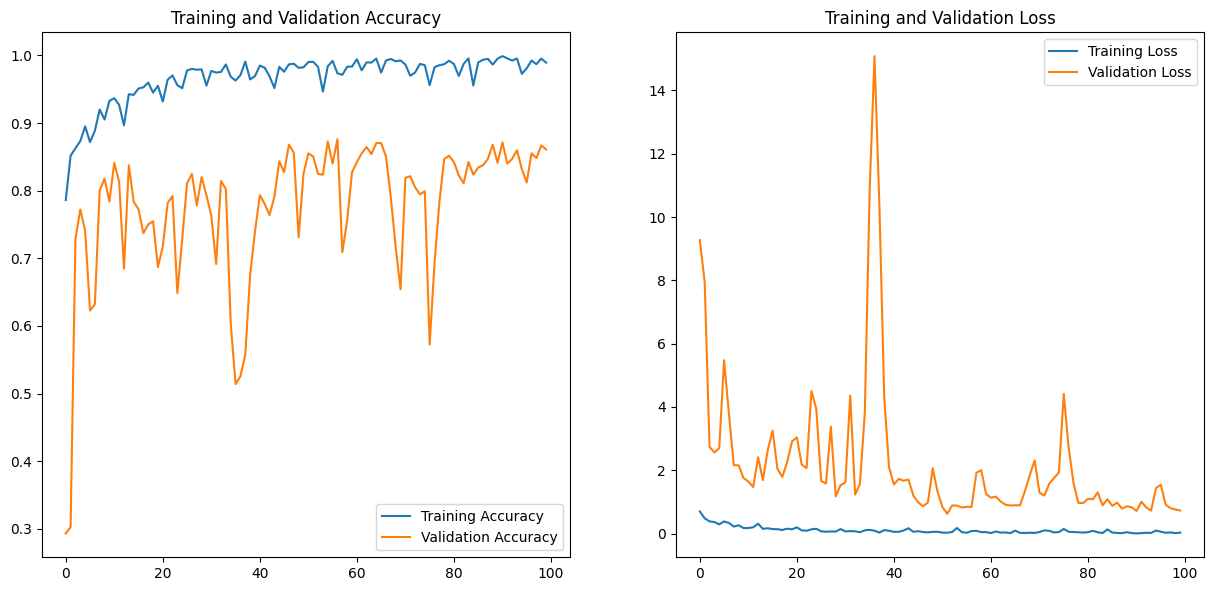

In [22]:

acc = history_tf.history['accuracy']
val_acc = history_tf.history['val_accuracy']
loss = history_tf.history['loss']
val_loss = history_tf.history['val_loss']
epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [23]:
model_MobileNetV2.evaluate(x_test, y_test)

25/25 [==============================] - 0s 12ms/step - loss: 0.6184 - accuracy: 0.8900


[0.618376612663269, 0.890038788318634]

# **ResNet50V2**

In [24]:
base_model = tf.keras.applications.ResNet50V2(input_shape = (64, 64, 3), include_top = False, weights = "imagenet")
model_ResNet50V2 = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(5, activation="softmax")                                     
                                ])
base_learning_rate = 0.000001
model_ResNet50V2.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
              metrics = ['accuracy'])

history_tf = model_ResNet50V2.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

94668760/94668760 [==============================] - 1s 0us/step
Epoch 1/100
218/218 [==============================] - 41s 52ms/step - loss: 0.6290 - accuracy: 0.7825 - val_loss: 1.4169 - val_accuracy: 0.6647
Epoch 2/100
218/218 [==============================] - 10s 46ms/step - loss: 0.5343 - accuracy: 0.8220 - val_loss: 2.9186 - val_accuracy: 0.4638
Epoch 3/100
218/218 [==============================] - 10s 45ms/step - loss: 0.4505 - accuracy: 0.8382 - val_loss: 0.7532 - val_accuracy: 0.7593
Epoch 4/100
218/218 [==============================] - 10s 45ms/step - loss: 0.3517 - accuracy: 0.8749 - val_loss: 0.8844 - val_accuracy: 0.7629
Epoch 5/100
218/218 [==============================] - 10s 45ms/step - loss: 1.0773 - accuracy: 0.6576 - val_loss: 13.9354 - val_accuracy: 0.5234
Epoch 6/100
218/218 [==============================] - 10s 46ms/step - loss: 1.0018 - accuracy: 0.7156 - val_loss: 48.8939 - val_accuracy: 0.6659
Epoch 7/100
218/218 [==============================] - 10s 46ms

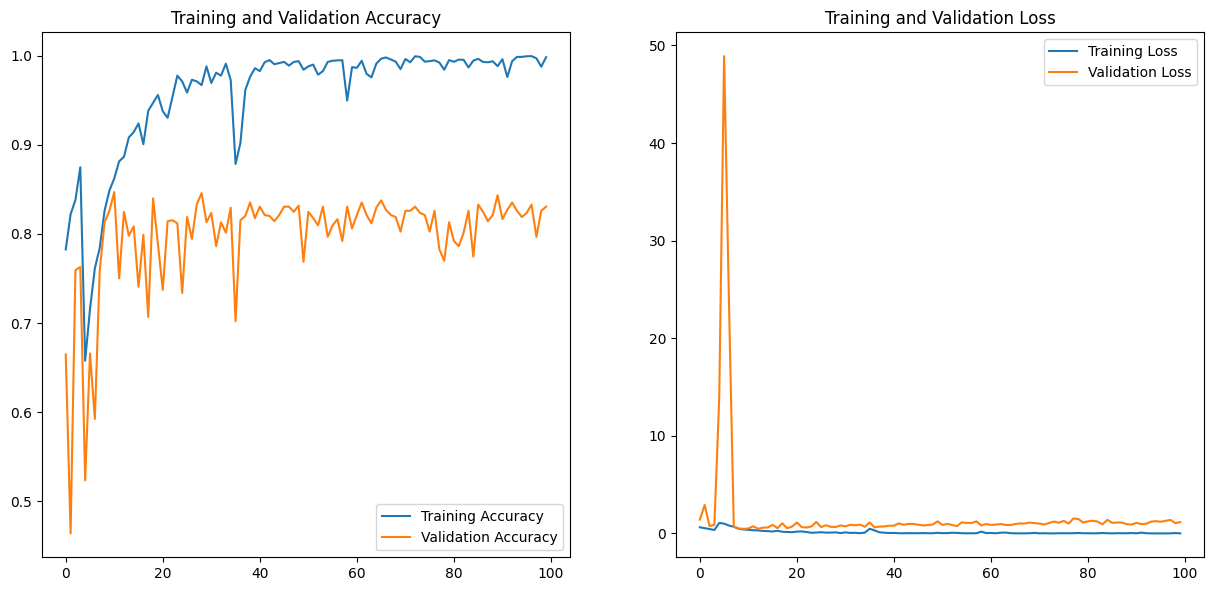

In [25]:

acc = history_tf.history['accuracy']
val_acc = history_tf.history['val_accuracy']
loss = history_tf.history['loss']
val_loss = history_tf.history['val_loss']
epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [26]:
model_ResNet50V2.evaluate(x_test, y_test)

25/25 [==============================] - 1s 24ms/step - loss: 0.9408 - accuracy: 0.8357


[0.9407772421836853, 0.835705041885376]

# **EfficientNetV2S**

In [27]:
base_model = tf.keras.applications.EfficientNetV2S(input_shape = (64, 64, 3), include_top = False, weights = "imagenet")
model_EfficientNetV2S = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(5, activation="softmax")                                     
                                ])
base_learning_rate = 0.000001
model_EfficientNetV2S.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
              metrics = ['accuracy'])

history_tf = model_EfficientNetV2S.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

82420632/82420632 [==============================] - 0s 0us/step
Epoch 1/100


2023-05-19 03:13:06.367000: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/efficientnetv2-s/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


218/218 [==============================] - 101s 101ms/step - loss: 0.6305 - accuracy: 0.7739 - val_loss: 0.6025 - val_accuracy: 0.7827
Epoch 2/100
218/218 [==============================] - 19s 86ms/step - loss: 0.3877 - accuracy: 0.8608 - val_loss: 1.3733 - val_accuracy: 0.5374
Epoch 3/100
218/218 [==============================] - 19s 88ms/step - loss: 0.2816 - accuracy: 0.8955 - val_loss: 1.9360 - val_accuracy: 0.2979
Epoch 4/100
218/218 [==============================] - 19s 86ms/step - loss: 0.2905 - accuracy: 0.8931 - val_loss: 3.1353 - val_accuracy: 0.1449
Epoch 5/100
218/218 [==============================] - 19s 86ms/step - loss: 0.2890 - accuracy: 0.8990 - val_loss: 0.4700 - val_accuracy: 0.8294
Epoch 6/100
218/218 [==============================] - 19s 85ms/step - loss: 0.1902 - accuracy: 0.9318 - val_loss: 1.4670 - val_accuracy: 0.5981
Epoch 7/100
218/218 [==============================] - 19s 87ms/step - loss: 0.1591 - accuracy: 0.9427 - val_loss: 1.5873 - val_accuracy: 0.

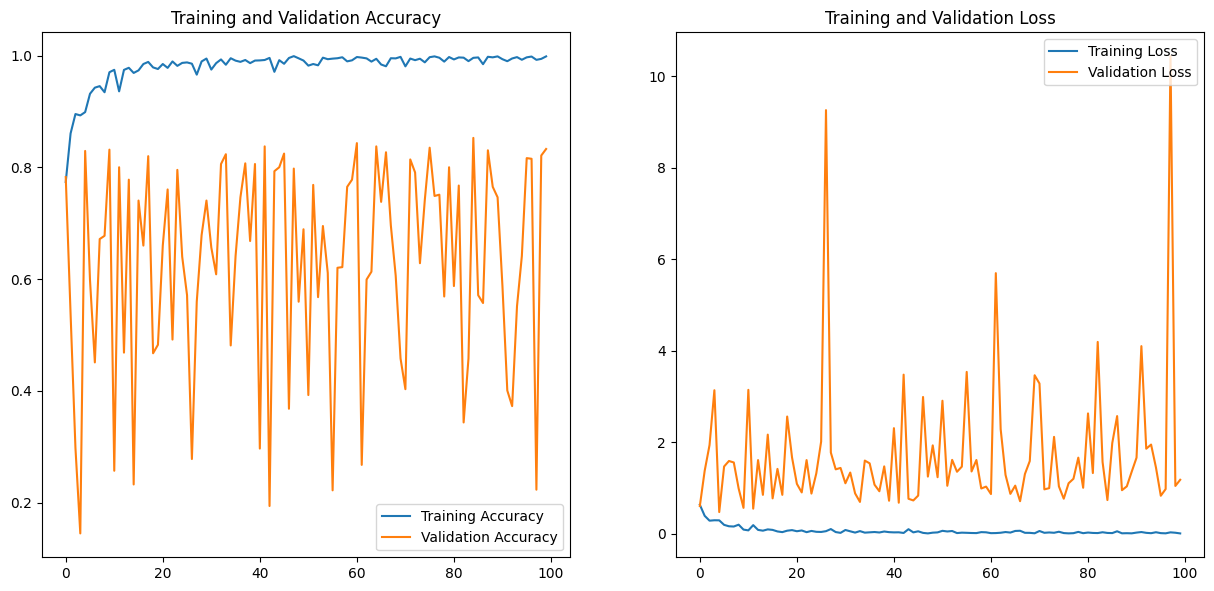

In [28]:

acc = history_tf.history['accuracy']
val_acc = history_tf.history['val_accuracy']
loss = history_tf.history['loss']
val_loss = history_tf.history['val_loss']
epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [29]:
model_EfficientNetV2S.evaluate(x_test, y_test)

25/25 [==============================] - 1s 45ms/step - loss: 0.8084 - accuracy: 0.8693


[0.8084021210670471, 0.8693402409553528]

# **Results**

* Sequential: 0.7827
* Sequential with learning rate change: 0.8461
* MobileNetV2: 0.8900
* ResNet50V2: 0.8357
* EfficientNetV2S: 0.8693